# L'Evoluzione della NBA: Dati, Successi e Storia delle Squadre (1947 - 2023)

In questo notebook analizzeremo i dati delle squadre della NBA dal 1947 al 2023. In particolare, ci concentreremo su:
- La storia delle squadre
- I successi delle squadre
- L'evoluzione dei dati delle squadre
- Le previsioni per il futuro
- Le conclusioni

# Importazione delle librerie

In [1050]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import folium
import seaborn as sns

# Importazione e pulizia dei dati

In [1051]:
teams = pd.read_csv('data/team.csv')
missing_data = teams.isnull().sum()

if missing_data.any():
    print("Ci sono valori mancanti nelle seguenti colonne nel dataset teams:")
    print(missing_data[missing_data > 0])
else:
    print("Non ci sono valori mancanti nel dataset teams")
    
colori = pd.read_csv('data/NBA_Team_Colors.csv')
missing_data = colori.isnull().sum()
if missing_data.any():
    print("Ci sono valori mancanti nelle seguenti colonne nel dataset colori:")
    print(missing_data[missing_data > 0])
else:
    print("Non ci sono valori mancanti nel dataset colori")

Non ci sono valori mancanti nel dataset teams
Ci sono valori mancanti nelle seguenti colonne nel dataset colori:
Additional Color    4
dtype: int64


In [1052]:
colori = colori.drop(columns=['Additional Color'])

In [1053]:
team_history = pd.read_csv('data/team_history.csv')
missing_data = team_history.isnull().sum()
if missing_data.any():
    print("Ci sono valori mancanti nelle seguenti colonne nel dataset team_history:")
    print(missing_data[missing_data > 0])
else:
    print("Non ci sono valori mancanti nel dataset team_history")

champions = pd.read_csv('data/NBA_Champions.csv')
missing_data = champions.isnull().sum()
if missing_data.any():
    print("Ci sono valori mancanti nelle seguenti colonne nel dataset champions:")
    print(missing_data[missing_data > 0])
else:
    print("Non ci sono valori mancanti nel dataset champions")


Non ci sono valori mancanti nel dataset team_history
Ci sono valori mancanti nelle seguenti colonne nel dataset champions:
MVP Name           6
MVP Height (m)     6
MVP Height (ft)    6
MVP Position       6
MVP Team           6
MVP Nationality    6
MVP status         6
dtype: int64


In [1054]:
champions[missing_data[missing_data > 0].index] = champions[missing_data[missing_data > 0].index].fillna("N/A")
print(champions.head())

   index  Year    Western Champion    Eastern Champion Result  \
0      0  1950  Minneapolis Lakers  Syracuse Nationals    4–2   
1      1  1951    Rochester Royals     New York Knicks    4–3   
2      2  1952  Minneapolis Lakers     New York Knicks    4–3   
3      3  1953  Minneapolis Lakers     New York Knicks    4–1   
4      4  1954  Minneapolis Lakers  Syracuse Nationals    4–3   

         NBA Champion   NBA Vice-Champion  Final Sweep ? MVP Name  \
0  Minneapolis Lakers  Syracuse Nationals          False      N/A   
1    Rochester Royals     New York Knicks          False      N/A   
2  Minneapolis Lakers     New York Knicks          False      N/A   
3  Minneapolis Lakers     New York Knicks          False      N/A   
4  Minneapolis Lakers  Syracuse Nationals          False      N/A   

  MVP Height (m) MVP Height (ft) MVP Position MVP Team MVP Nationality  \
0            N/A             N/A          N/A      N/A             N/A   
1            N/A             N/A          N/A 

In [1055]:
team_color_name= pd.merge(colori, teams[['id', 'full_name']], on='id', how='left')

team_color_name = team_color_name[['full_name', 'Primary Color', 'Secondary Color']]

print(team_color_name.head())

           full_name Primary Color Secondary Color
0      Atlanta Hawks       #E03A3E         #C1D32F
1     Boston Celtics       #007A33         #BA9653
2      Brooklyn Nets       #000000         #FFFFFF
3  Charlotte Hornets       #1D1160         #00788C
4      Chicago Bulls       #CE1141         #000000


In [1056]:
team_history.head()

team_id        city    nickname  year_founded  year_active_till
0  1610612737     Atlanta       Hawks          1968              2019
1  1610612737   St. Louis       Hawks          1955              1967
2  1610612737   Milwaukee       Hawks          1951              1954
3  1610612737  Tri-Cities  Blackhawks          1949              1950
4  1610612741     Chicago       Bulls          1966              2019

In [1057]:
games = pd.read_csv('data/game.csv')
missing_data = colori.isnull().sum()
if missing_data.any():
    print("Ci sono valori mancanti nelle seguenti colonne nel dataset games:")
    print(missing_data[missing_data > 0])
else:
    print("Non ci sono valori mancanti nel dataset games")
games.head()

Non ci sono valori mancanti nel dataset games


season_id  team_id_home team_abbreviation_home           team_name_home  \
0      21946    1610610035                    HUS          Toronto Huskies   
1      21946    1610610034                    BOM        St. Louis Bombers   
2      21946    1610610032                    PRO  Providence Steamrollers   
3      21946    1610610025                    CHS            Chicago Stags   
4      21946    1610610028                    DEF          Detroit Falcons   

    game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
0  24600001  1946-11-01 00:00:00  HUS vs. NYK       L    0      25.0  ...   
1  24600003  1946-11-02 00:00:00  BOM vs. PIT       W    0      20.0  ...   
2  24600002  1946-11-02 00:00:00  PRO vs. BOS       W    0      21.0  ...   
3  24600004  1946-11-02 00:00:00  CHS vs. NYK       W    0      21.0  ...   
4  24600005  1946-11-02 00:00:00  DEF vs. WAS       L    0      10.0  ...   

   reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  \
0       NaN       NaN       NaN       NaN       NaN      NaN      68.0   
1       NaN       NaN       NaN       NaN       NaN     25.0      51.0   
2       NaN       NaN       NaN       NaN       NaN      NaN      53.0   
3       NaN       NaN       NaN       NaN       NaN     22.0      47.0   
4       NaN       NaN       NaN       NaN       NaN      NaN      50.0   

   plus_minus_away  video_available_away     season_type  
0                2                     0  Regular Season  
1               -5                     0  Regular Season  
2               -6                     0  Regular Season  
3              -16                     0  Regular Season  
4               17                     0  Regular Season  

[5 rows x 55 columns]

In [1058]:
games['game_date'] = pd.to_datetime(games['game_date'])
games['season'] = games['game_date'].dt.year

# Filtra le partite di stagione regolare con vittoria in casa
home_wins = games[(games['wl_home'] == 'W') & (games['season_type'] == 'Regular Season')].groupby(['team_id_home', 'season']).size().reset_index(name='home_wins')

away_wins = games[(games['wl_away'] == 'W') & (games['season_type'] == 'Regular Season')].groupby(['team_id_away', 'season']).size().reset_index(name='away_wins')
home_wins = home_wins.rename(columns={'team_id_home': 'team_id'})
away_wins = away_wins.rename(columns={'team_id_away': 'team_id'})

total_wins = pd.merge(home_wins, away_wins, on=['team_id', 'season'], how='outer').fillna(0)
total_wins['total_wins'] = total_wins['home_wins'] + total_wins['away_wins']


total_wins = total_wins.merge(teams[['id', 'full_name']], left_on='team_id', right_on='id', how='inner').drop(columns='id')

total_wins.head()


team_id  season  home_wins  away_wins  total_wins      full_name
0  1610612737    1949          7        1.0         8.0  Atlanta Hawks
1  1610612737    1950         28        7.0        35.0  Atlanta Hawks
2  1610612737    1951         16        2.0        18.0  Atlanta Hawks
3  1610612737    1952         16        2.0        18.0  Atlanta Hawks
4  1610612737    1953         22        4.0        26.0  Atlanta Hawks

In [1059]:
# Aggiungi il nome storico della squadra alla tabella team_history
team_history['historic_name'] = team_history['city'] + ' ' + team_history['nickname']

team_history = pd.merge(team_history, teams[['id', 'full_name']], left_on='team_id', right_on='id', how='left')
team_history = team_history.drop(columns=['id'])
team_history = team_history.rename(columns={'full_name': 'current_full_name'})

team_history = team_history.drop(columns=['city', 'nickname'])

# Unifico l'anno di fondazione usando sempre l'anno più basso
team_history_grouped = team_history.groupby('team_id')['year_founded'].min().reset_index()

team_history = pd.merge(team_history, team_history_grouped[['team_id', 'year_founded']], on='team_id', how='left')

team_history = team_history.rename(columns={'year_founded_y': 'year_founded'})

team_history = team_history.drop(columns=['year_founded_x'])

team_history = team_history.drop(columns=['year_active_till'])

team_history.head()

team_id          historic_name current_full_name  year_founded
0  1610612737          Atlanta Hawks     Atlanta Hawks          1949
1  1610612737        St. Louis Hawks     Atlanta Hawks          1949
2  1610612737        Milwaukee Hawks     Atlanta Hawks          1949
3  1610612737  Tri-Cities Blackhawks     Atlanta Hawks          1949
4  1610612741          Chicago Bulls     Chicago Bulls          1966

In [1060]:
# Sostituisci i nomi storici con quelli correnti
name_mapping = dict(zip(team_history['historic_name'], team_history['current_full_name']))

team_columns = ['Western Champion', 'Eastern Champion', 'NBA Champion', 'NBA Vice-Champion', 'MVP Team']

for column in team_columns:
    champions[column] = champions[column].map(lambda x: name_mapping.get(x, x))

champions.head()

index  Year    Western Champion    Eastern Champion Result  \
0      0  1950  Los Angeles Lakers  Philadelphia 76ers    4–2   
1      1  1951    Sacramento Kings     New York Knicks    4–3   
2      2  1952  Los Angeles Lakers     New York Knicks    4–3   
3      3  1953  Los Angeles Lakers     New York Knicks    4–1   
4      4  1954  Los Angeles Lakers  Philadelphia 76ers    4–3   

         NBA Champion   NBA Vice-Champion  Final Sweep ? MVP Name  \
0  Los Angeles Lakers  Philadelphia 76ers          False      N/A   
1    Sacramento Kings     New York Knicks          False      N/A   
2  Los Angeles Lakers     New York Knicks          False      N/A   
3  Los Angeles Lakers     New York Knicks          False      N/A   
4  Los Angeles Lakers  Philadelphia 76ers          False      N/A   

  MVP Height (m) MVP Height (ft) MVP Position MVP Team MVP Nationality  \
0            N/A             N/A          N/A      N/A             N/A   
1            N/A             N/A          N/A      N/A             N/A   
2            N/A             N/A          N/A      N/A             N/A   
3            N/A             N/A          N/A      N/A             N/A   
4            N/A             N/A          N/A      N/A             N/A   

  MVP status  
0        N/A  
1        N/A  
2        N/A  
3        N/A  
4        N/A

In [1061]:
players = pd.read_csv('data/common_player_info.csv')
if missing_data.any():
    print("Ci sono valori mancanti nelle seguenti colonne nel dataset players:")
    print(missing_data[missing_data > 0])
else:
    print("Non ci sono valori mancanti nel dataset players")


Non ci sono valori mancanti nel dataset players


In [1062]:
player_per_game = pd.read_csv('data/player_per_game.csv')
if missing_data.any():
    print("Ci sono valori mancanti nelle seguenti colonne nel dataset player_per_game:")
    print(missing_data[missing_data > 0])
else:
    print("Non ci sono valori mancanti nel dataset player_per_game")

Non ci sono valori mancanti nel dataset player_per_game


In [1063]:
position_dict = {
    'PG': 'Playmaker',
    'SG': 'Guardia',
    'SF': 'Ala Piccola',
    'PF': 'Ala Grande',
    'C': 'Centro',
    'F': 'Forward',
    'G': 'Guardia',
}

In [1064]:
event_types_dict = {
    1: "Tiro segnato",
    2: "Tiro mancato",
    3: "Free Throw Attempt",
    4: "Rebound",
    5: "Turnover",
    6: "Foul",
    7: "Violation",
    8: "Substitution",
    9: "Timeout",
    10: "Jump Ball",
    11: "Ejection",
    12: "Start of Period",
    13: "End of Period",
    18: "Weird and unknown (e.g., retired players, bugs)"
}

three_points_dict = {
    1: "Tiro da 3pt segnato",
    2: "Tiro da 3pt mancato"
}

three_point_codes = {1, 79, 80, 103}


# Le squadre che hanno vinto più titoli NBA

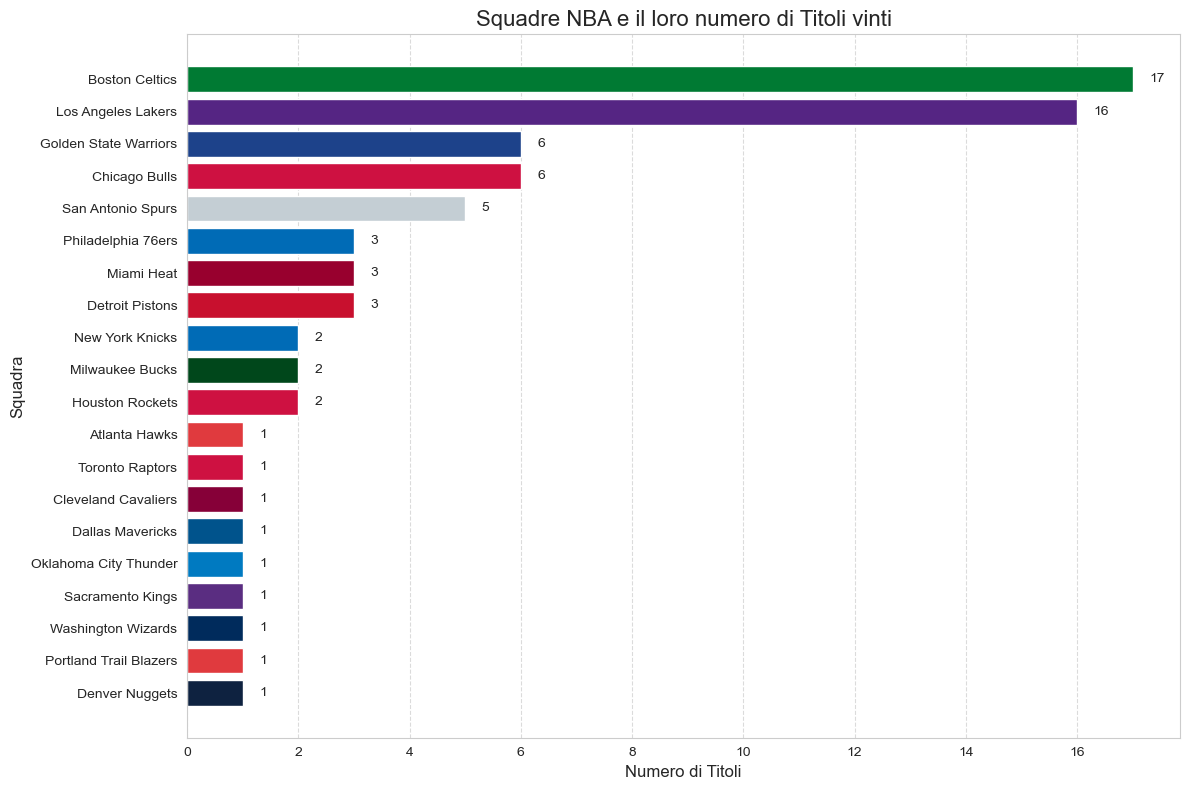

In [1065]:
champion_counts = champions['NBA Champion'].value_counts()

team_counts = champion_counts.reset_index()
team_counts.columns = ['team', 'count']

team_colors = pd.merge(team_counts, team_color_name[['full_name', 'Primary Color']],
                       left_on='team', right_on='full_name', how='left')

team_colors_sorted = team_colors.sort_values(by='count', ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(team_colors_sorted['team'], team_colors_sorted['count'], color=team_colors_sorted['Primary Color'])

plt.title('Squadre NBA e il loro numero di Titoli vinti', fontsize=16)

plt.xlabel('Numero di Titoli', fontsize=12)
plt.ylabel('Squadra', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(False)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.3, bar.get_y() + bar.get_height() / 2, str(xval), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Percentuale di Vittorie
Distribuzione dei titoli NBA vinti tra le top 5 squadre.

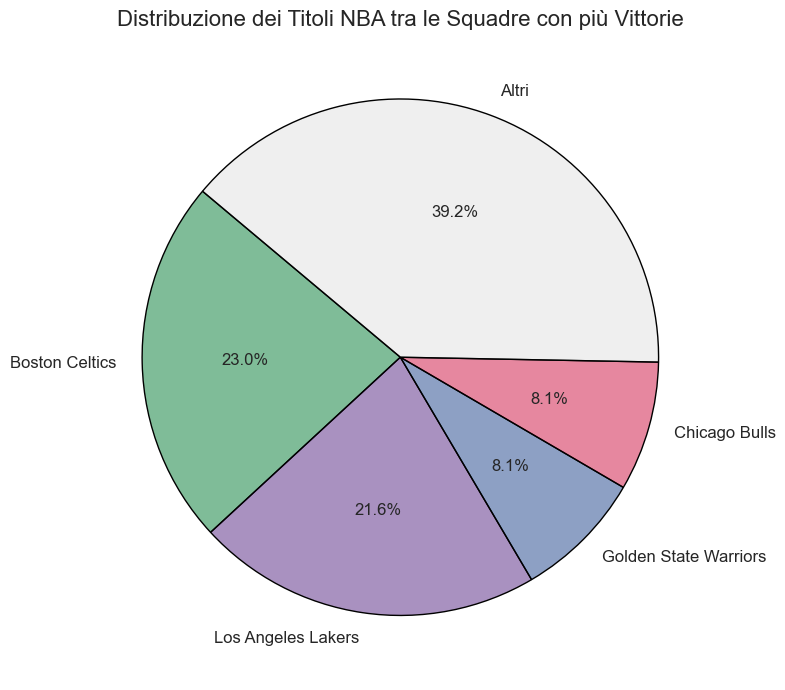

In [1066]:
team_colors_sorted = team_colors.sort_values(by='count', ascending=False)

top_2 = team_colors_sorted.iloc[:4].copy()

other_count = team_colors_sorted.iloc[4:]['count'].sum()
other_df = pd.DataFrame({'team': ['Altri'], 'count': [other_count], 'Primary Color': ['#E0E0E0']})


top_8 = pd.concat([top_2, other_df], ignore_index=True)
top_8['Color Opacity'] = top_8['Primary Color'].apply(
    lambda color: f"{color}80"
)

plt.figure(figsize=(10, 7))
plt.pie(
    top_8['count'],
    labels=top_8['team'],
    colors=top_8['Color Opacity'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)

plt.title('Distribuzione dei Titoli NBA tra le Squadre con più Vittorie', fontsize=16)

plt.tight_layout()
plt.show()

# Percentuale di Vittorie in Casa e in Trasferta

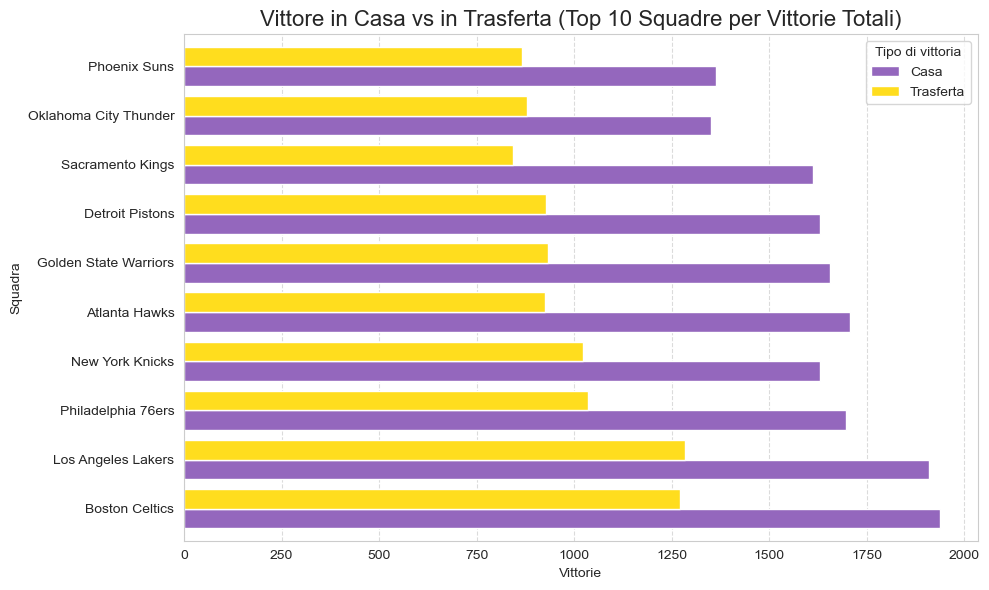

In [1067]:
top_10_total_wins = total_wins.groupby('full_name')[['home_wins', 'away_wins', 'total_wins']].sum().sort_values(by='total_wins', ascending=False).head(10)
ax = top_10_total_wins[['home_wins', 'away_wins']].plot(kind='barh', figsize=(10, 6), width=0.8, color=['#9467bd', '#ffdd1e'])

ax.grid(axis='y', visible=False)

plt.title("Vittore in Casa vs in Trasferta (Top 10 Squadre per Vittorie Totali)", fontsize=16)
plt.xlabel("Vittorie")
plt.ylabel("Squadra")
plt.legend(["Casa", "Trasferta"], title="Tipo di vittoria")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()



# Vittore NBA per Anno

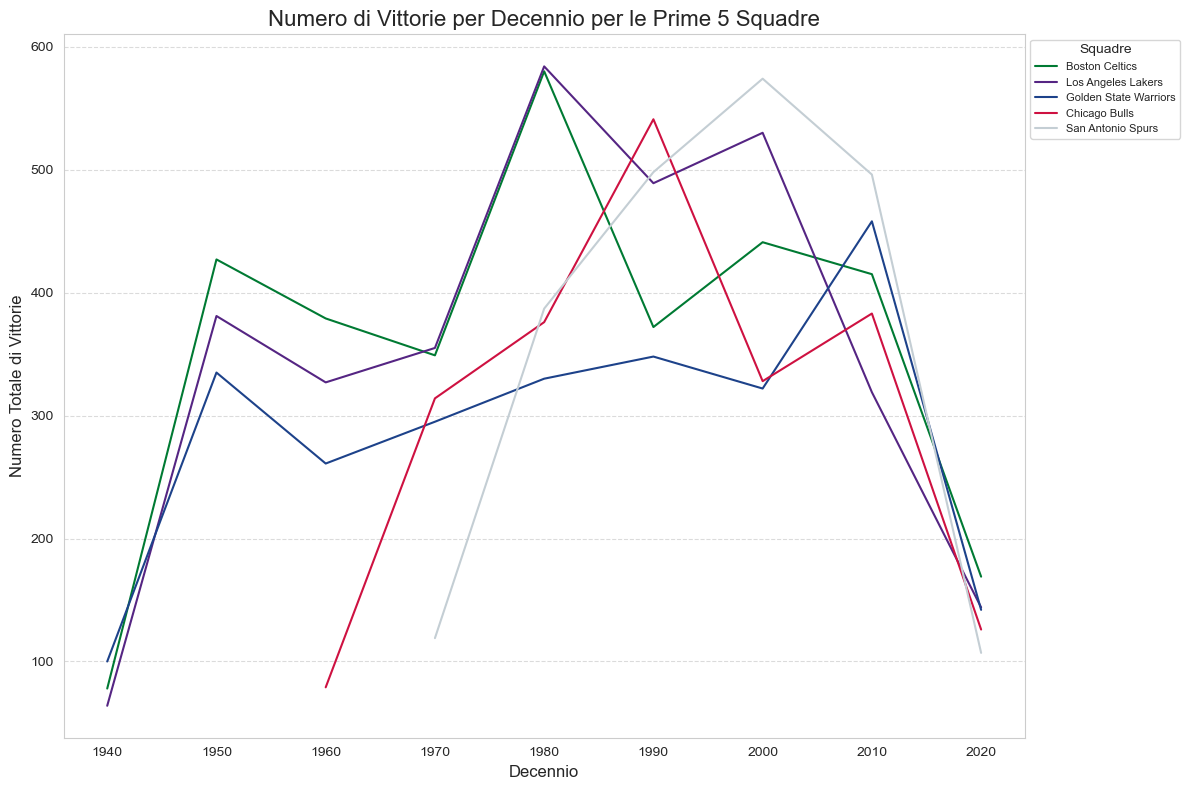

In [1068]:
total_wins['decade'] = (total_wins['season'] // 10) * 10

top_5_teams = team_counts['team'].head(5)
top_5_total_wins = total_wins[total_wins['full_name'].isin(top_5_teams)]

top_5_total_wins_by_decade = top_5_total_wins.groupby(['full_name', 'decade'])['total_wins'].sum().reset_index()

team_colors = pd.merge(top_5_total_wins_by_decade, team_color_name[['full_name', 'Primary Color']], 
                       left_on='full_name', right_on='full_name', how='left')

plt.figure(figsize=(12, 8))

for team_name in top_5_teams:
    team_data = team_colors[team_colors['full_name'] == team_name]
    
    plt.plot(team_data['decade'], team_data['total_wins'], label=team_name, color=team_data['Primary Color'].iloc[0])

plt.title('Numero di Vittorie per Decennio per le Prime 5 Squadre', fontsize=16)
plt.xlabel('Decennio', fontsize=12)
plt.ylabel('Numero Totale di Vittorie', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', visible=False)


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8, title="Squadre")

plt.tight_layout()
plt.show()


# Colori delle squadre della NBA

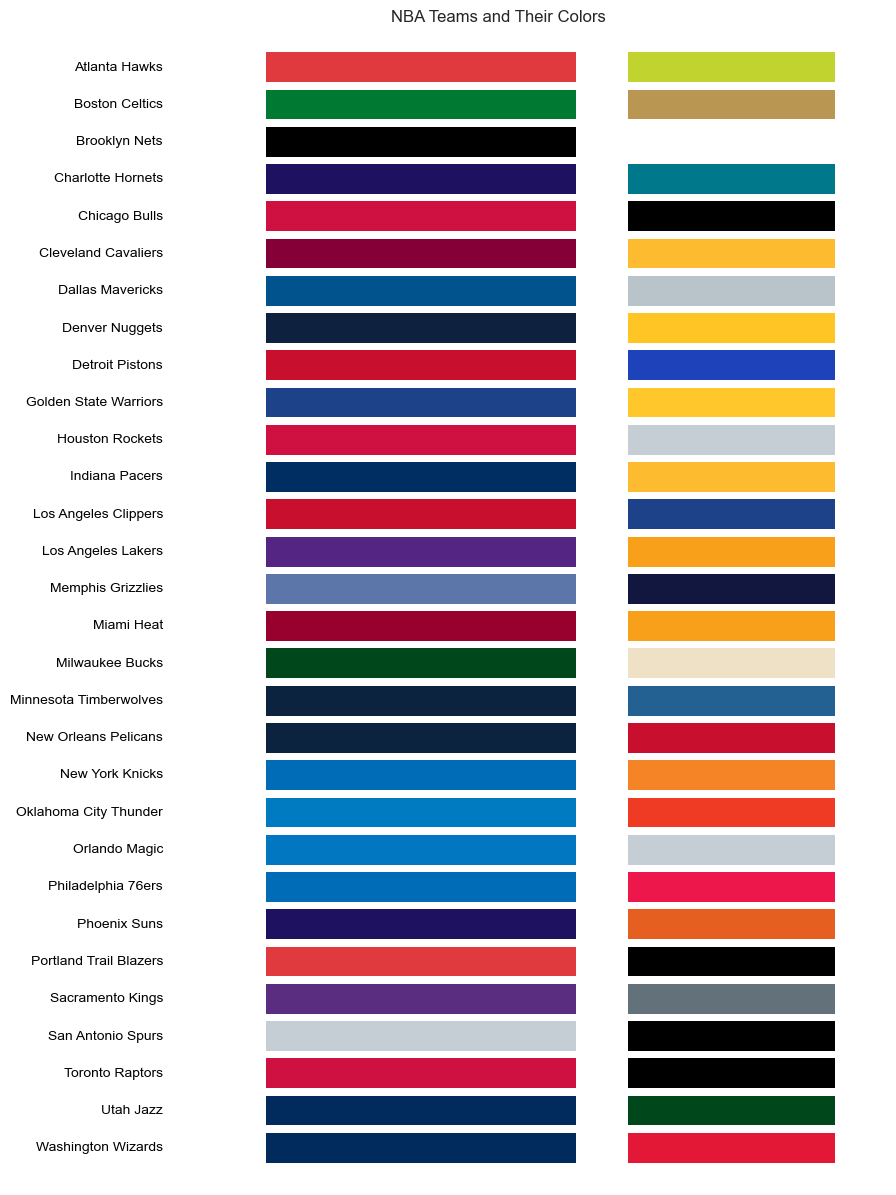

In [1069]:
fig, ax = plt.subplots(figsize=(10, len(team_color_name) * 0.5))
ax.axis("off")

for idx, row in team_color_name.iterrows():
    y = len(team_color_name) - idx - 1

    ax.text(-0.1, y, row["full_name"], va="center", ha="right", fontsize=10, color="black")

    if pd.notna(row["Primary Color"]):
        rect = patches.Rectangle((0, y - 0.4), 0.3, 0.8, linewidth=1, edgecolor="none", facecolor=row["Primary Color"])
        ax.add_patch(rect)

    if pd.notna(row["Secondary Color"]):
        rect = patches.Rectangle((0.35, y - 0.4), 0.2, 0.8, linewidth=1, edgecolor="none", facecolor=row["Secondary Color"])
        ax.add_patch(rect)

ax.set_xlim(-0.15, 0.6)
ax.set_ylim(-1, len(team_color_name))

plt.title("NBA Teams and Their Colors")
plt.show()

# Distribzione peso e altezza dei giocatori che hanno iniziato la carriera prima del 2000

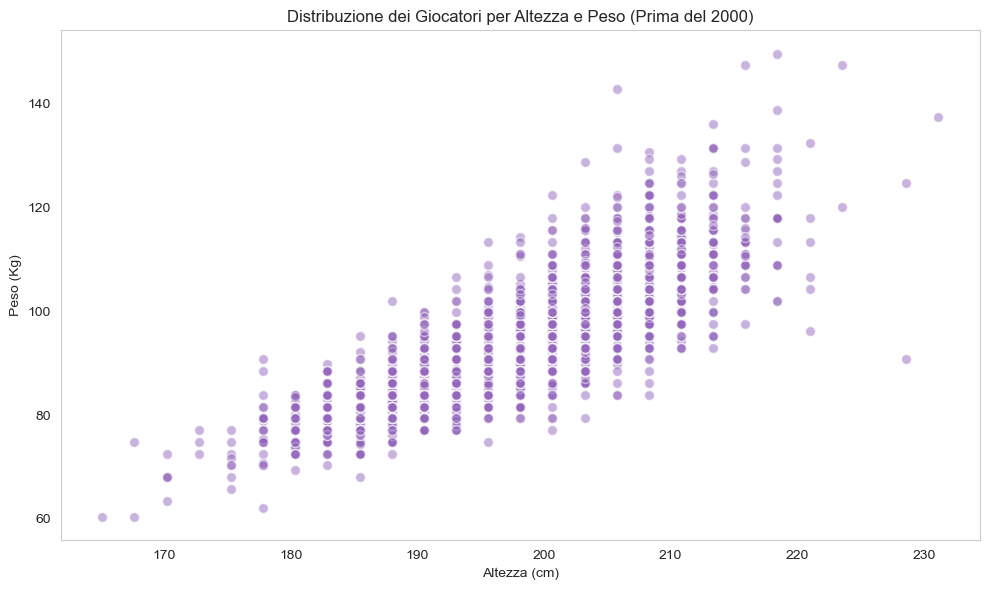

In [1070]:
players = players.dropna(subset=['height', 'weight'])

def convert_height(height):
    try:
        feet, inches = height.split("-")
        feet = int(feet)
        inches = int(inches)
        height_cm = (feet * 30.48) + (inches * 2.54)
        return height_cm
    except:
        return None

players['height_cm'] = players['height'].apply(convert_height)
players['weight_kg'] = players['weight'] * 0.453592

players = players.drop(columns=['height', 'weight'])

players = players.rename(columns={'height_cm': 'height', 'weight_kg': 'weight'})

players = players.sort_values(by='height')

pre_2000 = players[players['from_year'] <= 2000]

plt.figure(figsize=(10, 6))
plt.scatter(pre_2000['height'], pre_2000['weight'], alpha=0.5, c='#9467bd', edgecolors='w', s=50)

plt.title('Distribuzione dei Giocatori per Altezza e Peso (Prima del 2000)')
plt.xlabel('Altezza (cm)')
plt.ylabel('Peso (Kg)')

plt.grid(False)

plt.tight_layout()
plt.show()

# Distribzione peso e altezza dei giocatori che hanno iniziato la carriera dopo il 2000

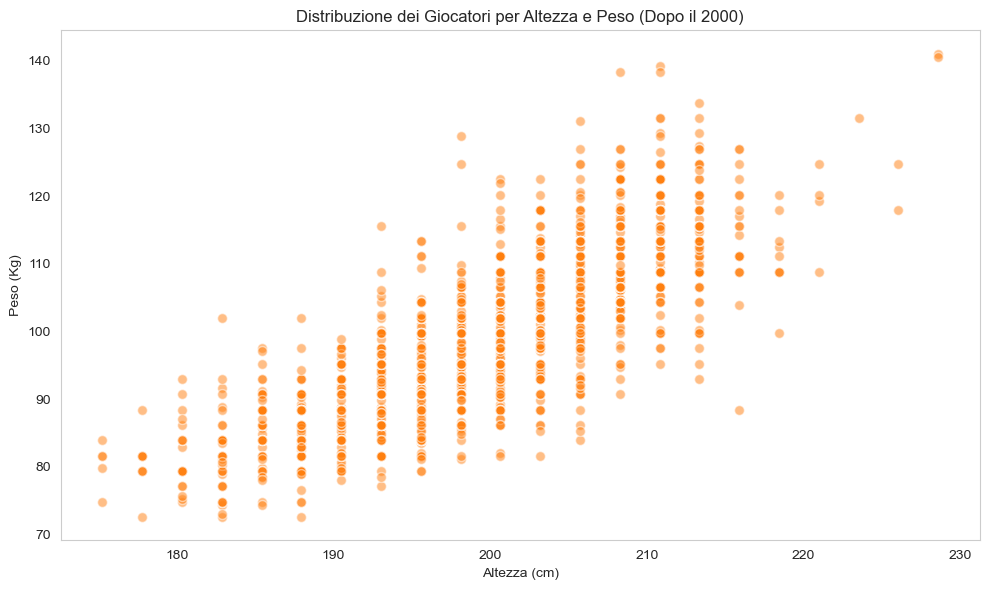

In [1071]:
post_2000 = players[players['from_year'] > 2000]

plt.figure(figsize=(10, 6))
plt.scatter(post_2000['height'], post_2000['weight'], alpha=0.5, c='#ff7f0e', edgecolors='w', s=50)

plt.title('Distribuzione dei Giocatori per Altezza e Peso (Dopo il 2000)')
plt.xlabel('Altezza (cm)')
plt.ylabel('Peso (Kg)')

plt.grid(False)

plt.tight_layout()
plt.show()

# Punti in base alla posizione in campo

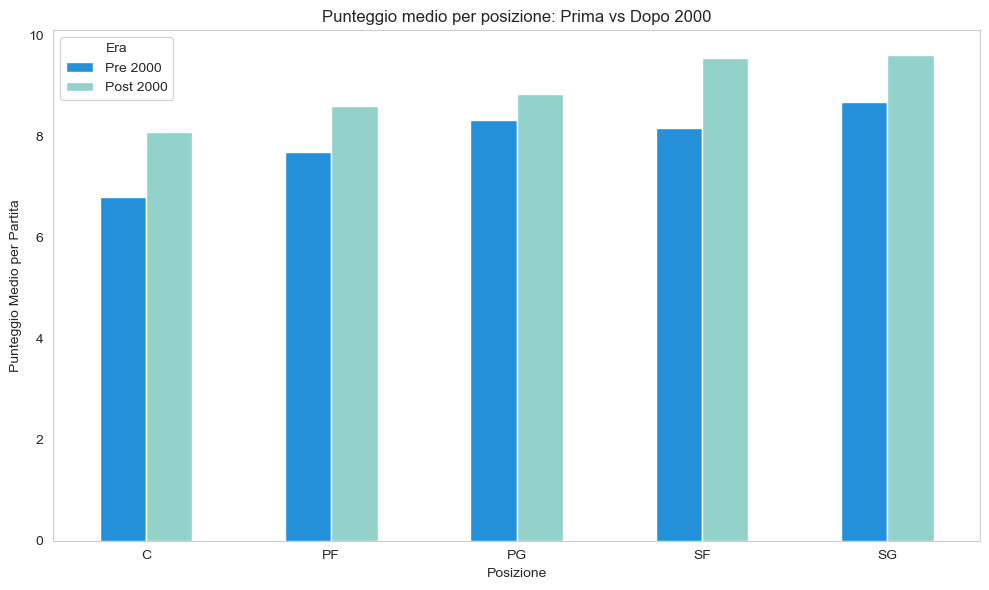

In [1072]:
player_per_game['pos_first'] = player_per_game['pos'].apply(lambda x: x.split('-')[0])

player_per_game['era'] = player_per_game['season'].apply(lambda x: 'Before 2000' if x < 2000 else 'After 2000')

avg_points = player_per_game.groupby(['pos_first', 'era'])['pts_per_game'].mean().unstack()

common_positions = avg_points.dropna().index

avg_points_filtered = avg_points.loc[common_positions]

colors = ['#2590da', '#93d2cb']

avg_points_filtered.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Punteggio medio per posizione: Prima vs Dopo 2000')
plt.xlabel('Posizione')
plt.ylabel('Punteggio Medio per Partita')
plt.xticks(rotation=0)
plt.legend(title='Era', labels=['Pre 2000', 'Post 2000'])

plt.grid(axis='y', visible=False)
plt.grid(axis='x', visible=False)

plt.tight_layout()

plt.show()


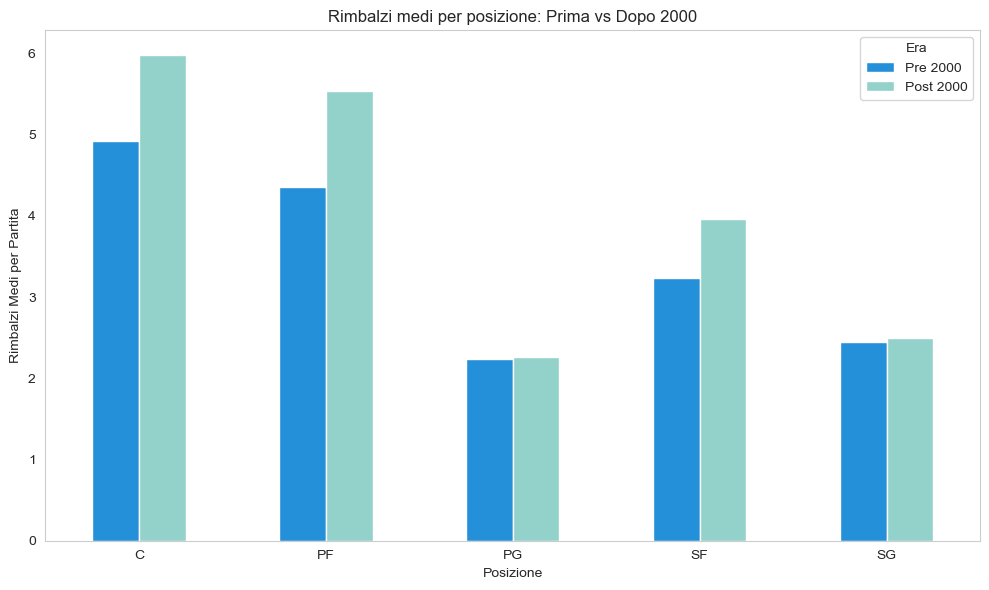

In [1073]:
avg_rebounds = player_per_game.groupby(['pos_first', 'era'])['trb_per_game'].mean().unstack()

common_positions = avg_rebounds.dropna().index

avg_rebounds_filtered = avg_rebounds.loc[common_positions]


avg_rebounds_filtered.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Rimbalzi medi per posizione: Prima vs Dopo 2000')
plt.xlabel('Posizione')
plt.ylabel('Rimbalzi Medi per Partita')
plt.xticks(rotation=0)
plt.legend(title='Era', labels=['Pre 2000', 'Post 2000'])
plt.grid(axis='y', visible=False)
plt.grid(axis='x', visible=False)
plt.tight_layout()

plt.show()

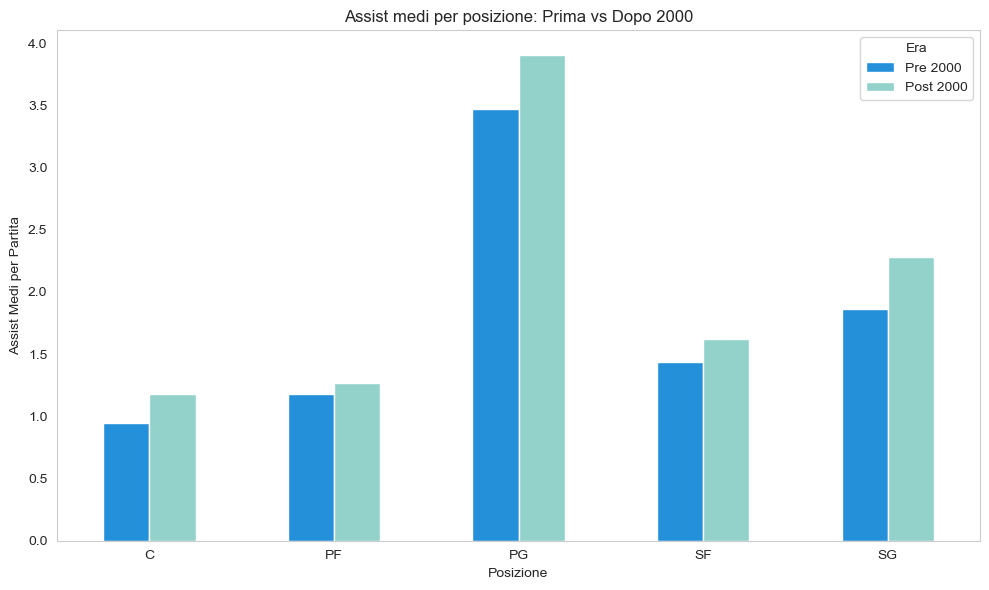

In [1074]:
avg_assists = player_per_game.groupby(['pos_first', 'era'])['ast_per_game'].mean().unstack()

common_positions = avg_assists.dropna().index

avg_assists_filtered = avg_assists.loc[common_positions]

avg_assists_filtered.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Assist medi per posizione: Prima vs Dopo 2000')
plt.xlabel('Posizione')
plt.ylabel('Assist Medi per Partita')
plt.xticks(rotation=0)
plt.legend(title='Era', labels=['Pre 2000', 'Post 2000'])
plt.grid(axis='y', visible=False)
plt.grid(axis='x', visible=False)
plt.tight_layout()

plt.show()

# Percentuale di tiri da 3 punti tra Magic Johnson e Stephen Curry

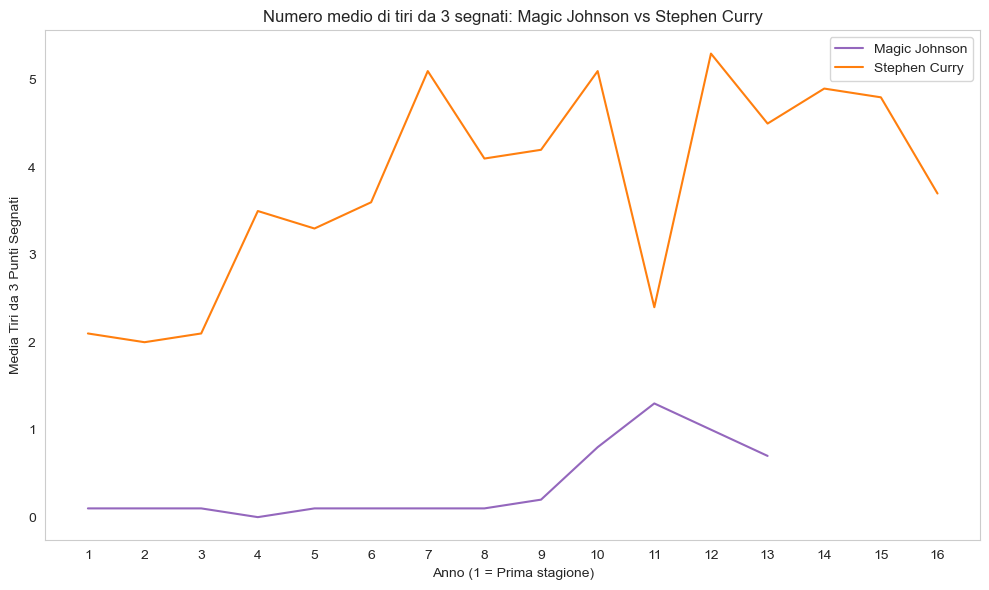

In [1075]:
magic_johnson = player_per_game[player_per_game['player'] == 'Magic Johnson'].iloc[::-1]
stephen_curry = player_per_game[player_per_game['player'] == 'Stephen Curry'].iloc[::-1]

magic_johnson['three_point_pct'] = magic_johnson['x3p_per_game']
stephen_curry['three_point_pct'] = stephen_curry['x3p_per_game']

magic_johnson['year_counter'] = range(1, len(magic_johnson) + 1)
stephen_curry['year_counter'] = range(1, len(stephen_curry) + 1)

plt.figure(figsize=(10, 6))
plt.plot(magic_johnson['year_counter'], magic_johnson['three_point_pct'], label='Magic Johnson', color='#9467bd')
plt.plot(stephen_curry['year_counter'], stephen_curry['three_point_pct'], label='Stephen Curry', color='#ff7f0e')

max_years = max(len(magic_johnson), len(stephen_curry))
plt.xticks(range(1, max_years + 1))

plt.title('Numero medio di tiri da 3 segnati: Magic Johnson vs Stephen Curry')
plt.xlabel('Anno (1 = Prima stagione)')
plt.ylabel('Media Tiri da 3 Punti Segnati')
plt.legend()

plt.grid(False)

plt.tight_layout()
plt.show()

# Confronto tra i due Centri: Hakeem Olajuwon e Nikola Jokić

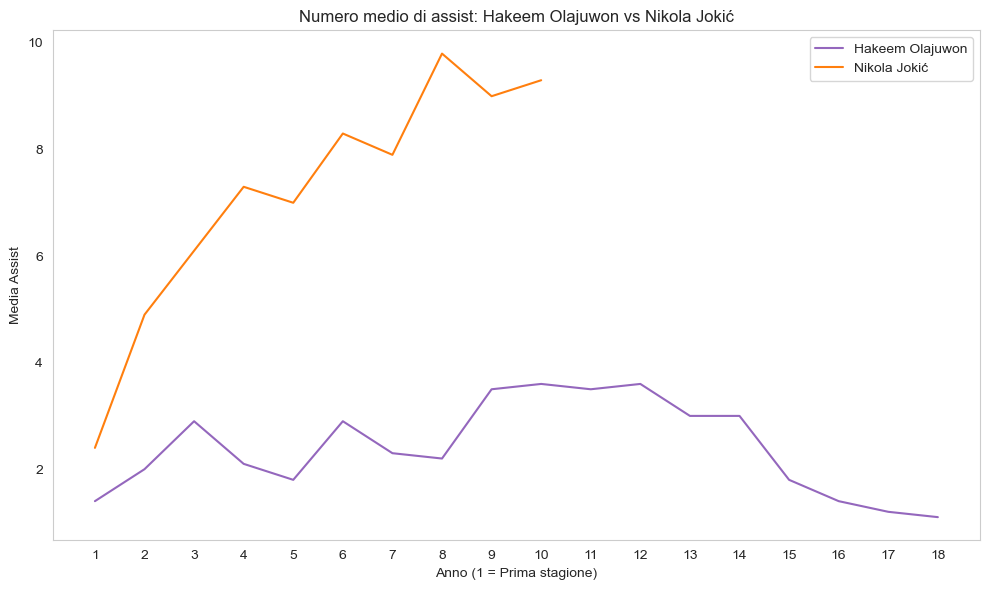

In [1076]:
hakeem_olajuwon = player_per_game[player_per_game['player'] == 'Hakeem Olajuwon'].iloc[::-1]
nikola_jokic = player_per_game[player_per_game['player'] == 'Nikola Jokić'].iloc[::-1]

hakeem_olajuwon['assist_pct'] = hakeem_olajuwon['ast_per_game']
nikola_jokic['assist_pct'] = nikola_jokic['ast_per_game']

hakeem_olajuwon['year_counter'] = range(1, len(hakeem_olajuwon) + 1)
nikola_jokic['year_counter'] = range(1, len(nikola_jokic) + 1)

plt.figure(figsize=(10, 6))
plt.plot(
    hakeem_olajuwon['year_counter'],
    hakeem_olajuwon['assist_pct'],
    label='Hakeem Olajuwon',
    color='#9467bd',
    linestyle='-'
)
plt.plot(
    nikola_jokic['year_counter'],
    nikola_jokic['assist_pct'],
    label='Nikola Jokić',
    color='#ff7f0e',
    linestyle='-'
)

max_years = max(len(hakeem_olajuwon), len(nikola_jokic))
plt.xticks(range(1, max_years + 1))

plt.title('Numero medio di assist: Hakeem Olajuwon vs Nikola Jokić')
plt.xlabel('Anno (1 = Prima stagione)')
plt.ylabel('Media Assist')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


# Confronto minuti giocati per partita tra due giocatori: 

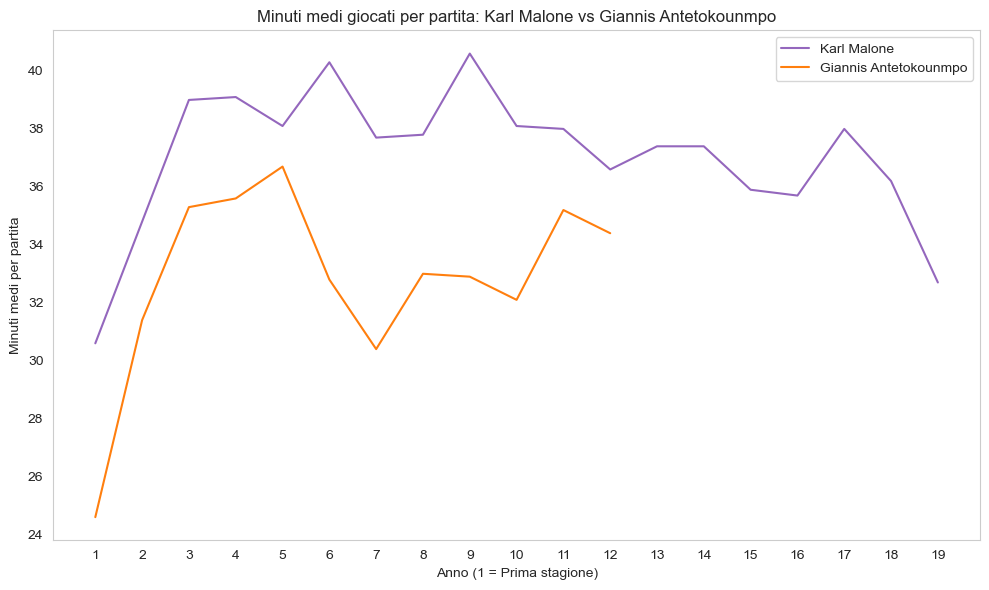

In [1077]:
karl_malone = player_per_game[player_per_game['player'] == 'Karl Malone'].iloc[::-1]
giannis_antetokounmpo = player_per_game[player_per_game['player'] == 'Giannis Antetokounmpo'].iloc[::-1]

karl_malone['year_counter'] = range(1, len(karl_malone) + 1)
giannis_antetokounmpo['year_counter'] = range(1, len(giannis_antetokounmpo) + 1)

plt.figure(figsize=(10, 6))
plt.plot(karl_malone['year_counter'], karl_malone['mp_per_game'], label='Karl Malone', color='#9467bd', linestyle='-')
plt.plot(giannis_antetokounmpo['year_counter'], giannis_antetokounmpo['mp_per_game'], label='Giannis Antetokounmpo', color='#ff7f0e', linestyle='-')

max_years = max(len(karl_malone), len(giannis_antetokounmpo))
plt.xticks(range(1, max_years + 1))

# Aggiorna titolo e assi
plt.title('Minuti medi giocati per partita: Karl Malone vs Giannis Antetokounmpo')
plt.xlabel('Anno (1 = Prima stagione)')
plt.ylabel('Minuti medi per partita')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


# Mappa stati uniti


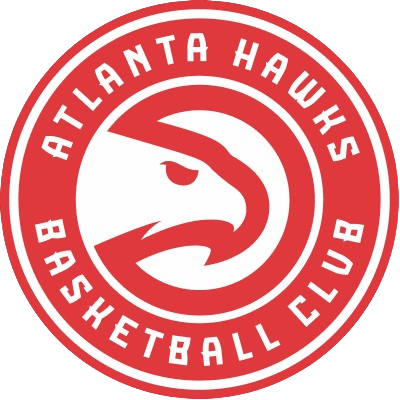
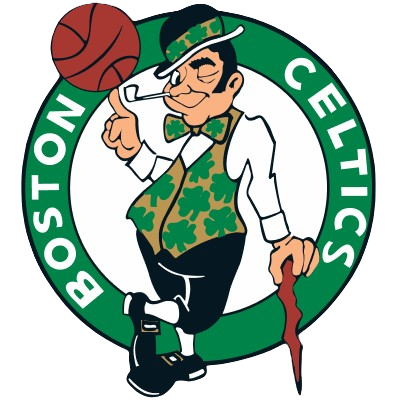
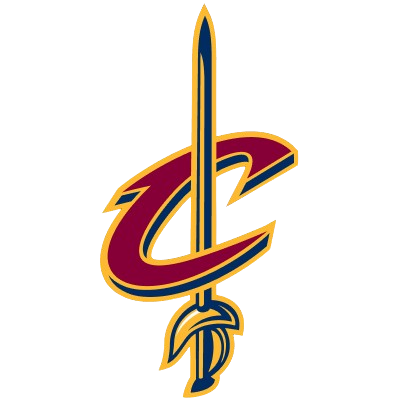
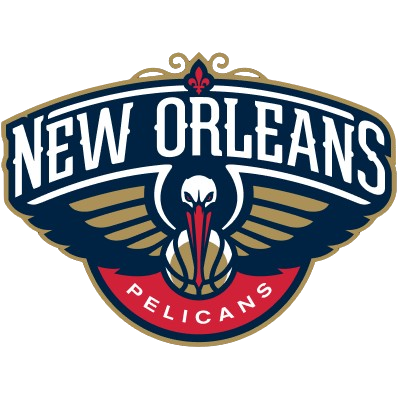
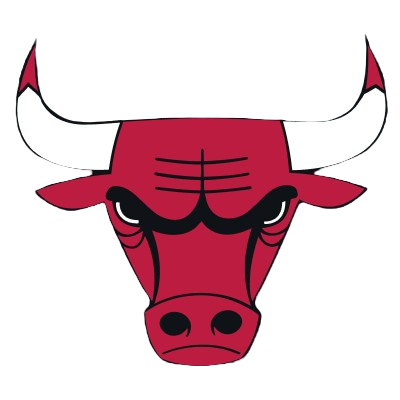
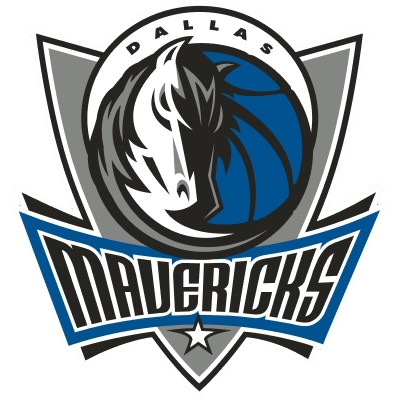
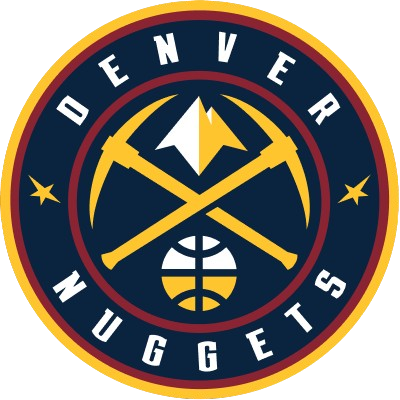
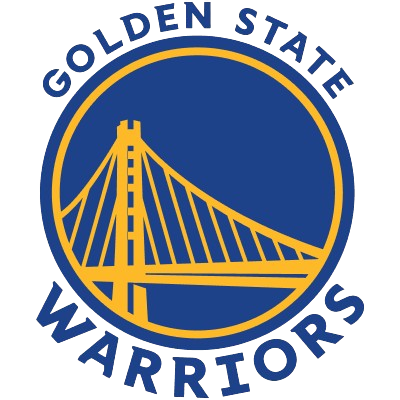
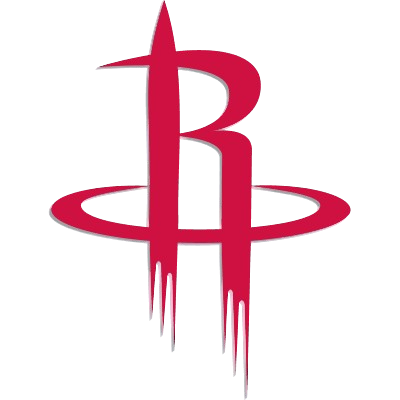
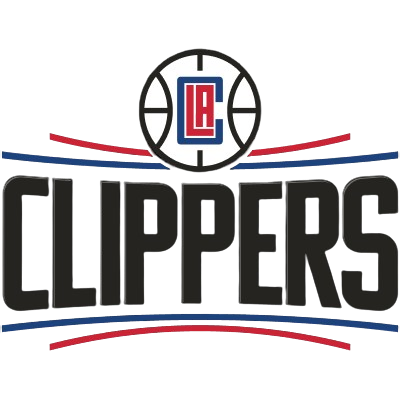
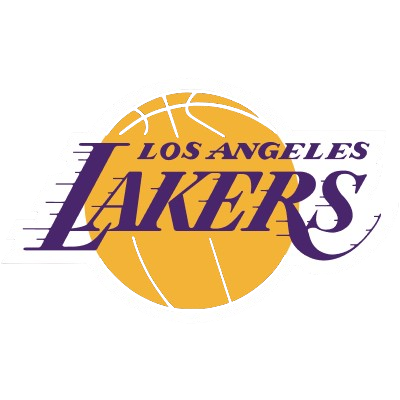
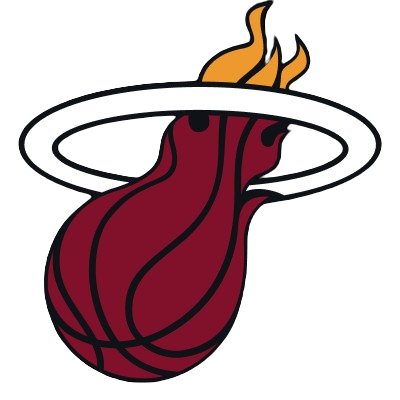
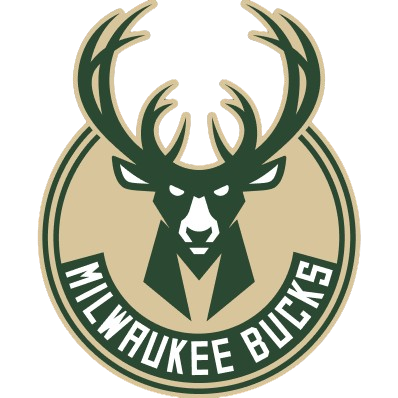
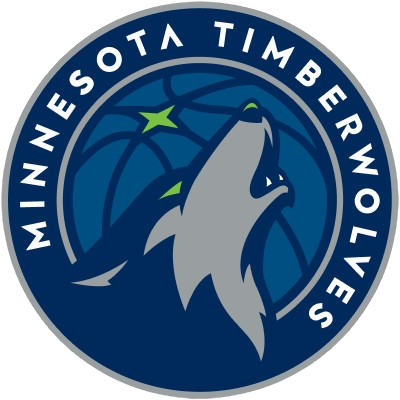
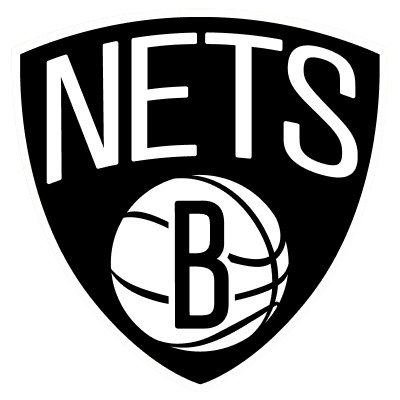
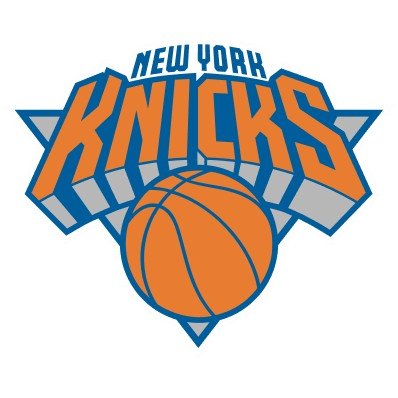
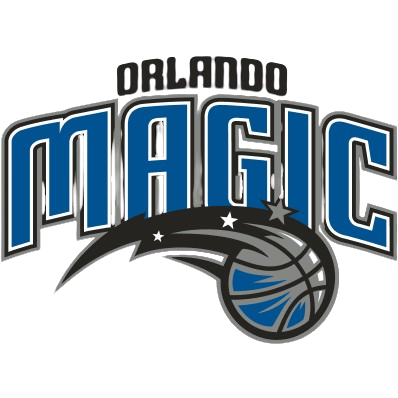
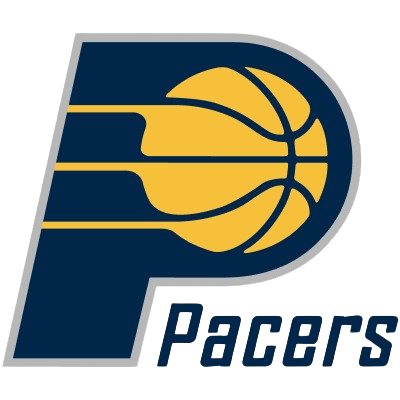
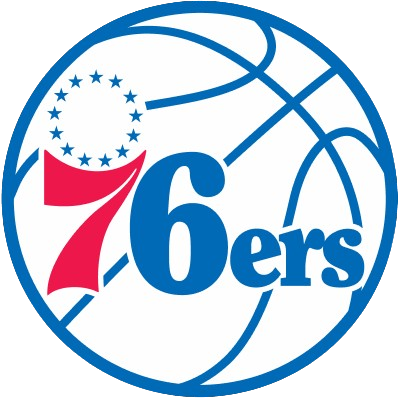
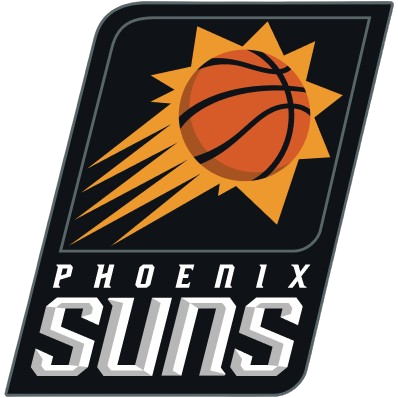
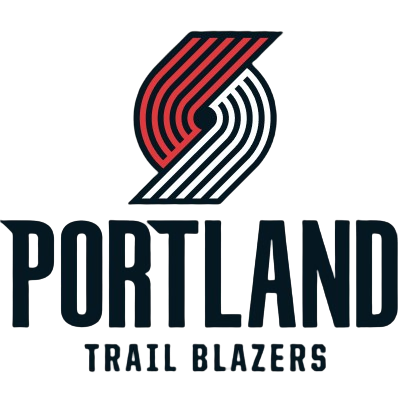
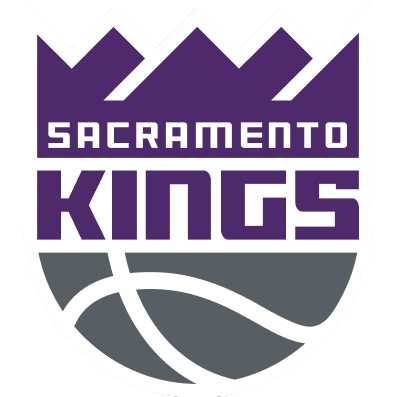
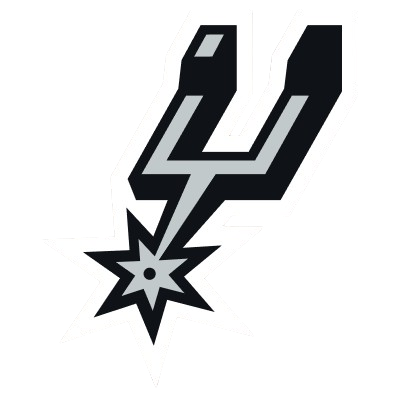
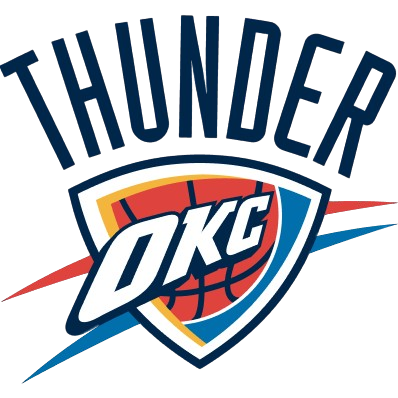
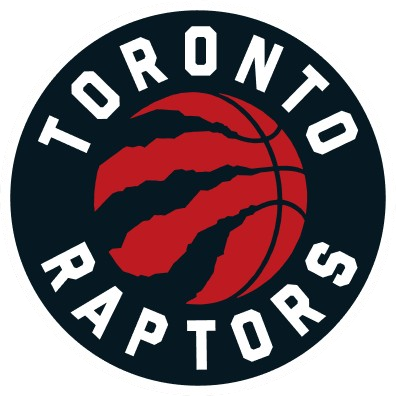
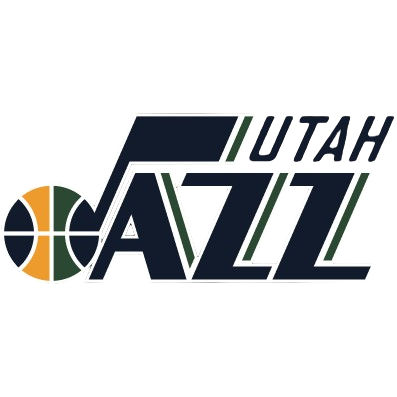
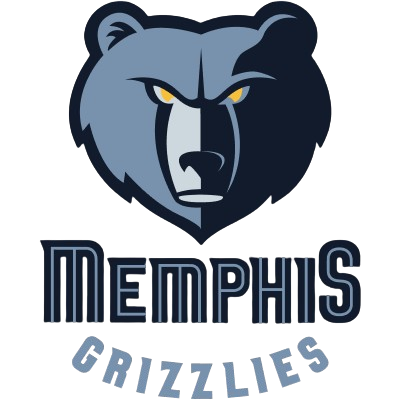
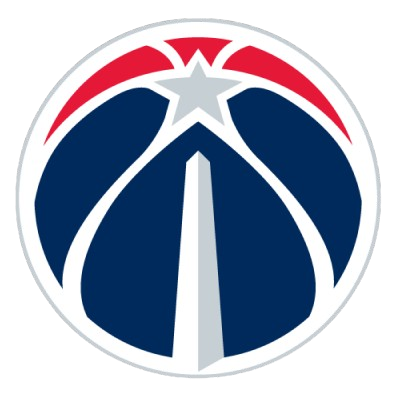
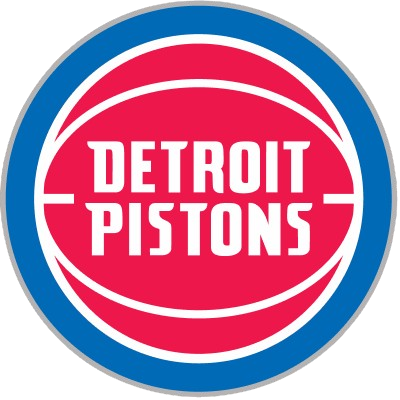
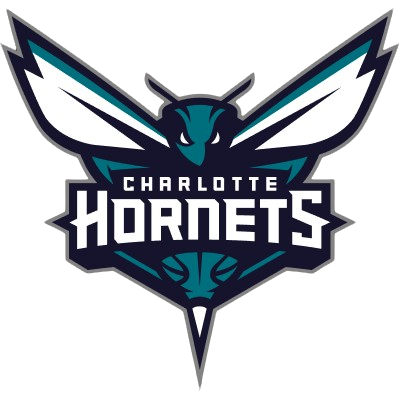

In [1078]:

file_path = 'data/us_map.json'
usa_map = gpd.read_file(file_path)

us_cities_data = pd.read_csv('data/us_cities.csv')
ca_cities_data = pd.read_csv('data/ca_cities.csv')

cities_nba = pd.merge(teams, us_cities_data, on='city', how='left', suffixes=('', '_us'))

cities_nba = pd.merge(cities_nba, ca_cities_data, on='city', how='left', suffixes=('', '_canada'))

cities_nba['latitude'] = cities_nba['lat'].combine_first(cities_nba['lat_canada'])
cities_nba['longitude'] = cities_nba['lon'].combine_first(cities_nba['lon_canada'])

cities_nba = cities_nba.drop(columns=['lat', 'lon', 'lat_canada', 'lon_canada'])

center = [39.8283, -98.5795]

# Creare la mappa basata su OpenStreetMap
mappa = folium.Map(location=center, zoom_start=4, control_scale=True)

for index, row in cities_nba.iterrows():
    city_name = row['city']
    team_name = row['full_name']
    latitude = row['latitude']
    longitude = row['longitude']
    
    icon_url = "icons/NBA/"+ row['abbreviation'] +".png"
    custom_icon = folium.CustomIcon(icon_image=icon_url, icon_size=(50, 50))
    folium.Marker(
        location=[latitude, longitude],
        popup=f"{city_name}, {team_name}",
        icon=custom_icon
    ).add_to(mappa)

folium.map.LayerControl().add_to(mappa)

mappa.save("usa_map_with_cities.html")
mappa

# Proporzione di Tiri da 3 Punti vs Tiri Totali per Anno

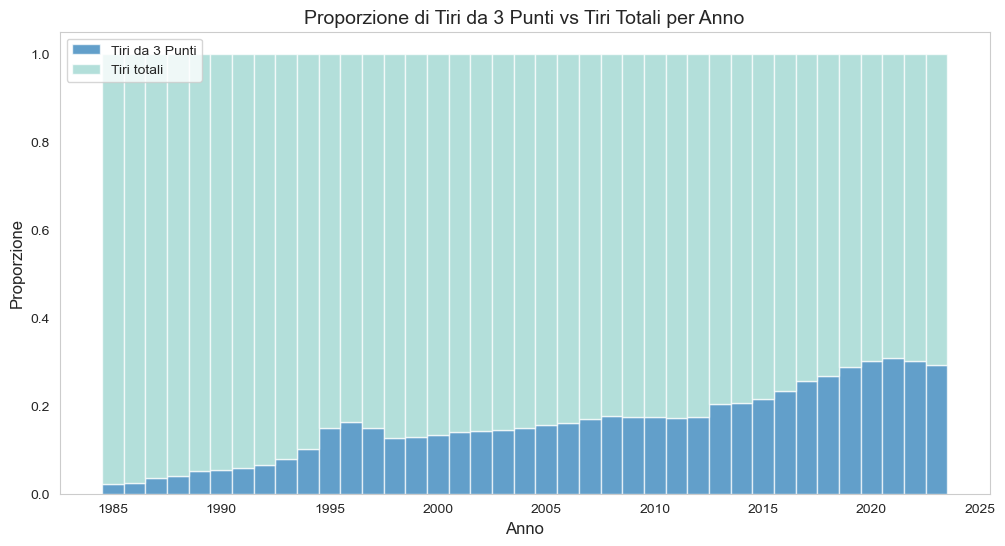

In [1079]:
season_games = games[(games['season_type'] == 'Regular Season') & (games['season'] > 1984)].copy()

season_games['3pt_ratio'] = (season_games['fg3m_home'] + season_games['fg3m_away']) / \
                            (season_games['fgm_home'] + season_games['fgm_away'])

season_games['total_shots_ratio'] = 1 - season_games['3pt_ratio']

season_games['year'] = season_games['season']
year_avg = season_games.groupby('year').agg({
    '3pt_ratio': 'mean',
    'total_shots_ratio': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.bar(year_avg['year'], year_avg['3pt_ratio'], color='#1f77b4', label='Tiri da 3 Punti', width=1.0, alpha=0.7)
plt.bar(year_avg['year'], year_avg['total_shots_ratio'], bottom=year_avg['3pt_ratio'], color='#93d2cb', label='Tiri totali', width=1.0, alpha=0.7)

plt.title('Proporzione di Tiri da 3 Punti vs Tiri Totali per Anno', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Proporzione', fontsize=12)

plt.legend(loc='upper left')
plt.grid(False)
plt.show()



# Statistiche verticali dei giocatori

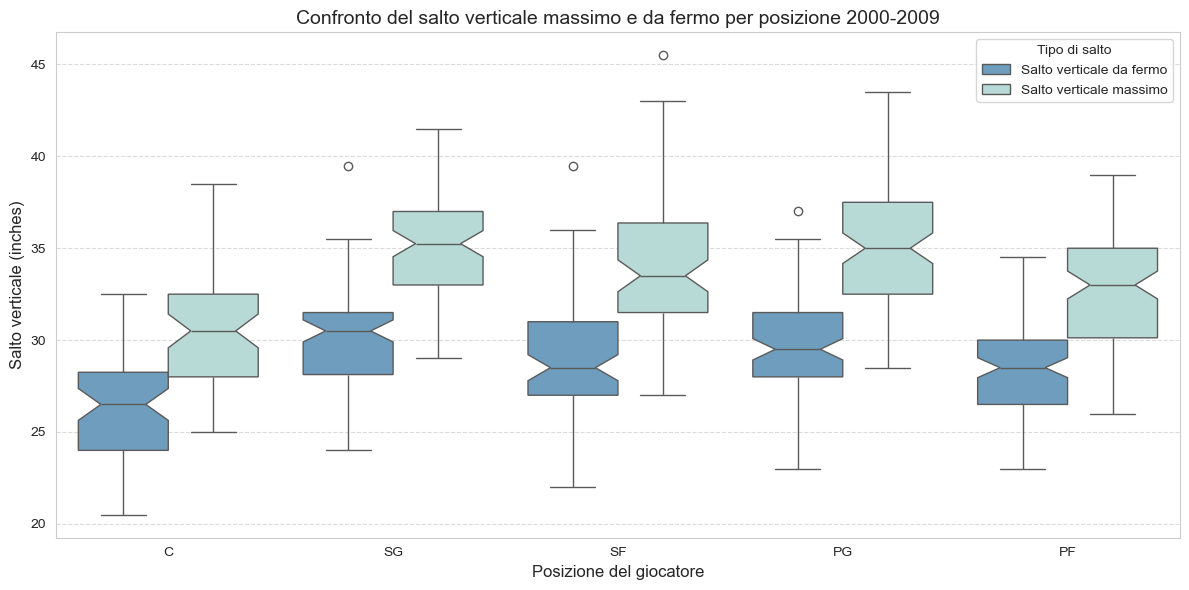

In [1080]:
draft = pd.read_csv('data/draft_combine_stats.csv')
draft = draft.dropna(subset=['position'])
draft['position'] = draft['position'].apply(lambda x: x.split('-')[0])
draft_pre_2010 = draft[draft['season'] < 2010]
columns_of_interest = ["position", "standing_vertical_leap", "max_vertical_leap"]
draft_cleaned = draft_pre_2010[columns_of_interest].dropna()

draft_melted = pd.melt(
    draft_cleaned,
    id_vars="position",
    value_vars=["standing_vertical_leap", "max_vertical_leap"],
    var_name="Vertical Leap Type",
    value_name="Leap Value"
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=draft_melted, x="position", y="Leap Value", hue="Vertical Leap Type",
            notch=True, palette=["#629fca", "#b3dfda"])

plt.title("Confronto del salto verticale massimo e da fermo per posizione 2000-2009", fontsize=14)
plt.xlabel("Posizione del giocatore", fontsize=12)
plt.ylabel("Salto verticale (inches)", fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Salto verticale da fermo', 'Salto verticale massimo']
plt.legend(handles=handles, labels=new_labels, title="Tipo di salto")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

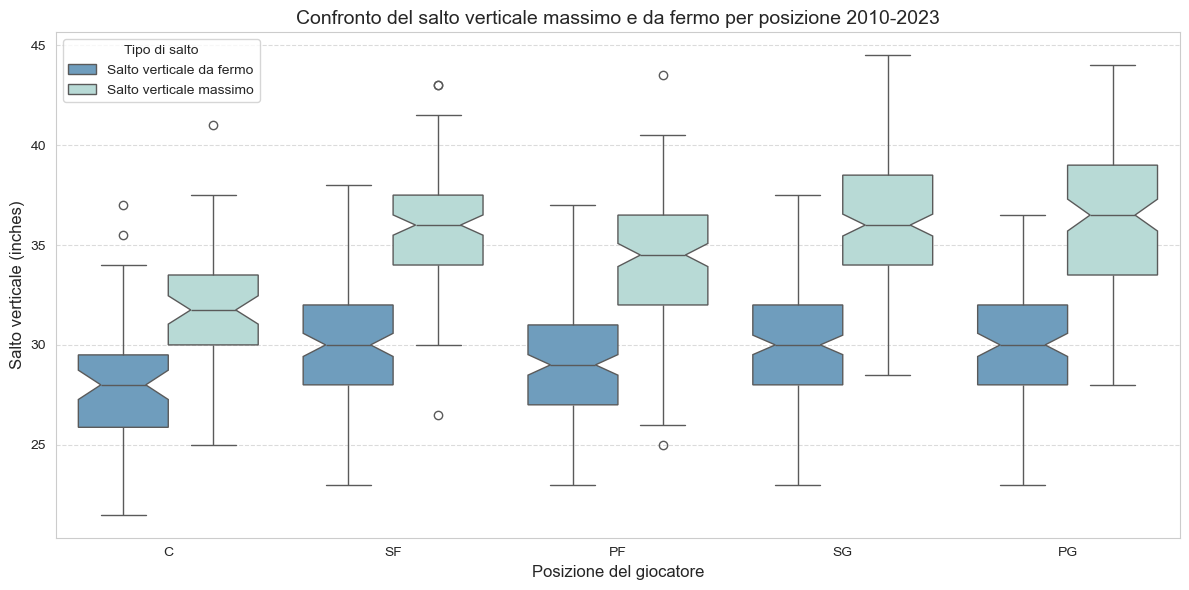

In [1081]:
draft_post_2010 = draft[draft['season'] >= 2010]
columns_of_interest = ["position", "standing_vertical_leap", "max_vertical_leap"]
draft_cleaned = draft_post_2010[columns_of_interest].dropna()

draft_melted = pd.melt(
    draft_cleaned,
    id_vars="position",
    value_vars=["standing_vertical_leap", "max_vertical_leap"],
    var_name="Vertical Leap Type",
    value_name="Leap Value"
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=draft_melted, x="position", y="Leap Value", hue="Vertical Leap Type",
            notch=True, palette=["#629fca", "#b3dfda"])

plt.title("Confronto del salto verticale massimo e da fermo per posizione 2010-2023", fontsize=14)
plt.xlabel("Posizione del giocatore", fontsize=12)
plt.ylabel("Salto verticale (inches)", fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Salto verticale da fermo', 'Salto verticale massimo']
plt.legend(handles=handles, labels=new_labels, title="Tipo di salto")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()